In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
df = pd.read_csv('../../NYT_full_reviews.csv')

In [4]:
df.columns

Index([u'byline', u'critics_pick', u'date_updated', u'display_title',
       u'headline', u'link_suggested_link_text', u'link_type', u'link_url',
       u'mpaa_rating', u'multimedia_height', u'multimedia_src',
       u'multimedia_type', u'multimedia_width', u'opening_date',
       u'publication_date', u'summary_short', u'multimedia',
       u'full_review_text'],
      dtype='object')

In [33]:
df.drop(['date_updated', 'headline', 'link_suggested_link_text', 'link_type', 'multimedia_height', 'multimedia_src', 'multimedia_type', 'multimedia_width', 'link_url', 'multimedia'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2016-06-30 to 1915-10-20
Data columns (total 10 columns):
byline              26280 non-null object
critics_pick        26280 non-null float64
date_updated        26265 non-null datetime64[ns]
display_title       26280 non-null object
mpaa_rating         13214 non-null object
opening_date        16630 non-null object
summary_short       20152 non-null object
full_review_text    26278 non-null object
year                26280 non-null int32
month               26280 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 2.0+ MB


In [10]:
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['date_updated'] = pd.to_datetime(df['date_updated'])

In [12]:
df.set_index('publication_date', inplace=True)

In [15]:
df['year'] = df.index.year
df['month'] = df.index.month

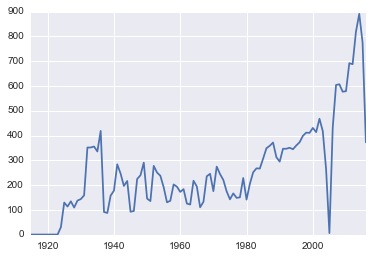

In [46]:
# reviews per year
df.year.value_counts().sort_index().plot()

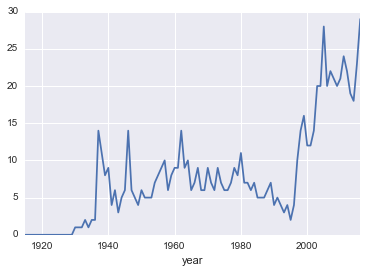

In [41]:
# plot % of movies that are "critics' picks" over time
grouped = df.groupby(by = 'year')
(100* grouped['critics_pick'].sum()/grouped['critics_pick'].count()).astype(int).plot()

In [47]:
# look at bylines
df['byline'] = [s.lower() for s in df.byline]
np.unique(df['byline'])

array(["' flame and the flesh' presented at state", '-- a. w.', '-- a.w.',
       '-- e.j.b.', '-- h. h. t.', '-- h.t.', '-- o. a. g.', '-- t. m. p.',
       '-- t.m.p.', '-- t.s.', '-a. w.', '..a.. w.', '.a.. w.', '.a..w.',
       '.a.w.', '.f. s. n.', '.p. w.', '].]3.', 'a. d. s.', 'a. h. w.',
       'a. h. weiler', 'a. h. weiler.', 'a. o. g.', 'a. o. scott', 'a. s.',
       'a. w', 'a. w,', 'a. w.', 'a.%v. ]', 'a.&#160;o. scott', 'a.. w.',
       'a.d.e.', 'a.d.s', 'a.d.s.', 'a.d.s.s.z.', 'a.h. weiler',
       'a.h. weiler.', 'a.h.weiler', 'a.p.s.', 'a.s.', 'a.w', 'a.w.',
       'aljean harmetz', 'allan kozinn', 'allen hughes',
       'andrbe sennwald.', 'andre senn wald.', 'andre sennwald',
       'andre sennwald.', 'andrea higbie', 'andrew geller  ',
       'andy webster', 'anet maslin', 'anita gates', 'anna kisselgoff',
       'anna kisselgoff ', 'annette insdorf',
       'as told to manohla dargis by lord dargis', 'b. c.',
       'b. c.e. j. b.', 'b. r. c.', 'b. r. crisler', 'b.

### Bylines are very messy. Clearly some misspellings, inconsistent formatting and odd use of initials. This will need a lot of cleaning up

In [58]:
df['byline'] = [s.lstrip('by ').lstrip('--').lstrip('--').lstrip('.').strip().replace('  ', ' ') for s in df.byline]

In [65]:
replace_dict = {
    'a. o .scott': 'a. o. scott',
    'a.&#160;o. scott': 'a. o. scott',
    'a.&nbsp;o. scott': 'a. o. scott',
    'a.o. scott': 'a. o. scott',
    'lawrnence van gelder': 'lawrence van gelder',
    'jeanette catsoulis': 'jeannette catsoulis',
    'as told to manohla dargis by lord dargis': np.nan,
    'jeannette catsoulis nathan lee': np.nan,
    'jeannette catsoulis nathan lee neil genzlinger laura kern': np.nan
}
df.replace(to_replace = {'byline': replace_dict}, inplace=True)

In [90]:
df_recent = df[df.year>=2000]

In [117]:
# drop rows with null review text or byline
df_recent.dropna(subset = ['full_review_text', 'byline'], inplace=True)

/Users/caitlingerrity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [118]:
df_recent.byline.value_counts()

a. o. scott            1783
stephen holden         1755
jeannette catsoulis    1101
manohla dargis         1081
neil genzlinger         470
elvis mitchell          463
nicolas rapold          353
andy webster            311
dave kehr               272
en kenigsberg           178
nathan lee              176
rachel saltz            174
mike hale               164
matt zoller seitz       151
daniel m. gold          112
lawrence van gelder      73
laura kern               60
anita gates              59
miriam bale              56
glenn kenny              55
david dewitt             54
ken jaworowski           41
nicole herrington        26
helen t. verongos        23
paul brunick             17
jon caramanica            9
dana stevens              3
janet maslin              2
carina chocano            2
roberta smith             1
ned martel                1
john anderson             1
ron wertheimer            1
phillip lopate            1
rian seibert              1
geoffrey o’brien    

In [115]:
# remove punctuation from review text
df_recent['full_review_text'] = df_recent['full_review_text'].apply(lambda x: re.sub(r'[^\w\s]','',x))

/Users/caitlingerrity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9035 entries, 2016-06-30 to 2000-01-07
Data columns (total 10 columns):
byline              9035 non-null object
critics_pick        9035 non-null float64
date_updated        9022 non-null datetime64[ns]
display_title       9035 non-null object
mpaa_rating         6041 non-null object
opening_date        4672 non-null object
summary_short       8839 non-null object
full_review_text    9035 non-null object
year                9035 non-null int32
month               9035 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 705.9+ KB


In [128]:
# fill NA mpaa rating with 'unknown'
df_recent.fillna({'mpaa_rating': 'unknown'}, axis=0, inplace=True)

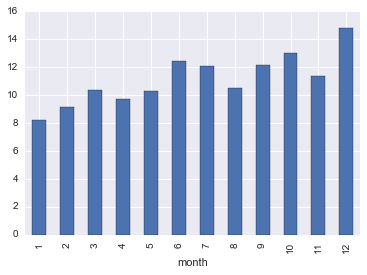

In [130]:
# look at % of movies that are critic's picks by month
grouped = df.groupby(by = 'month')
(100* grouped['critics_pick'].sum()/grouped['critics_pick'].count()).plot(kind='bar')

In [131]:
# save cleaned file for reviews after 2000
df_recent.to_csv('../../NYT_Reviews_Cleaned.csv', encoding='utf-8')